In [55]:
import geopandas as gpd
import pandas as pd
import folium

In [ ]:
def prep_data(match_path, mig_path, gdf_path):

    # match
    match = pd.read_csv(match_path)
    match["B"] = match["shapeID"].str.split("-").str[3]
    match = match[['shapeID', 'MUNI2015', 'B']]
    match.columns = ['shapeID', 'sending', 'B']

    # mig
    mig = pd.read_csv(mig_path)
    mig = pd.merge(match, mig, on = 'sending')
    mig = mig[['US_MIG_05_10', 'B']]

    # gdf
    gdf = gpd.read_file(gdf_path)#
    gdf['geometry'] = gdf['geometry'].simplify(10)
    gdf['col'] = [i for i in range(len(gdf))]
    gdf['B'] = match["shapeID"].str.split("-").str[3]
    gdf = pd.merge(gdf, mig, on = 'B')

    gdf_json = gdf.to_json()

    return gdf, gdf_json

In [130]:
match = pd.read_csv("./gB_IPUMS_match.csv")
match["B"] = match["shapeID"].str.split("-").str[3]
match = match[['shapeID', 'MUNI2015', 'B']]
match.columns = ['shapeID', 'sending', 'B']
match.head()

,shapeID,sending,B
0,MEX-ADM2-1590546715-B1,1002,B1
1,MEX-ADM2-1590546715-B2,1011,B2
2,MEX-ADM2-1590546715-B3,1007,B3
3,MEX-ADM2-1590546715-B4,1008,B4
4,MEX-ADM2-1590546715-B5,1005,B5


In [131]:
mig = pd.read_csv("./us_migration.csv")
mig = pd.merge(match, mig, on = 'sending')
mig = mig[['US_MIG_05_10', 'B', 'sending']]
mig.head()

,US_MIG_05_10,B,sending
0,479,B1,1002
1,494,B3,1007
2,222,B4,1008
3,342,B5,1005
4,2063,B7,1001


In [132]:
gdf = gpd.read_file("/Users/heatherbaier/Desktop/CAOE/site/geoBoundariesSimplified-3_0_0-MEX-ADM2-shp/geoBoundariesSimplified-3_0_0-MEX-ADM2.shp")#
gdf['geometry'] = gdf['geometry'].simplify(10)
gdf['col'] = [i for i in range(len(gdf))]
gdf['B'] = match["shapeID"].str.split("-").str[3]


gdf = pd.merge(gdf, mig, on = 'B')

gdf.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,col,B,US_MIG_05_10,sending
0,Asientos,None,MEX-ADM2-3_0_0-B1,MEX,ADM2,"POLYGON ((-101.99941 22.21951, -101.85423 22.0...",0,B1,479,1002
1,RincÃ³n de Romos,None,MEX-ADM2-3_0_0-B3,MEX,ADM2,"POLYGON ((-102.18902 22.36244, -102.25997 22.1...",2,B3,494,1007
2,San JosÃ© de Gracia,None,MEX-ADM2-3_0_0-B4,MEX,ADM2,"POLYGON ((-102.35385 22.12064, -102.58183 21.9...",3,B4,222,1008
3,JesÃºs MarÃ­a,None,MEX-ADM2-3_0_0-B5,MEX,ADM2,"POLYGON ((-102.32387 21.93653, -102.46178 21.8...",4,B5,342,1005
4,Aguascalientes,None,MEX-ADM2-3_0_0-B7,MEX,ADM2,"POLYGON ((-102.32387 21.93653, -102.07196 21.7...",6,B7,2063,1001


In [109]:
gdf_json = gdf.to_json()

<AxesSubplot:>

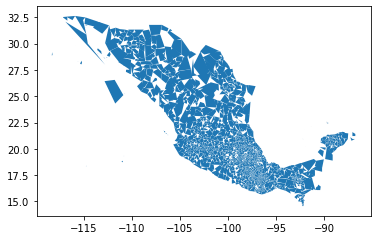

In [95]:
gdf.plot()

In [129]:
m = folium.Map(location=[23.6345, -92.5528], zoom_start=5)

def style_function(feature):
    return {
        "stroke": 0,
        "color": "#FFFFFF"
    }

folium.Choropleth(
    geo_data=gdf_json,
    name="choropleth",
    data=mig,
    columns=["B", "US_MIG_05_10"],
    key_on="feature.properties.B",
    fill_color="YlGn",
    fill_opacity=1,
    weight= 1,
    # color= "#white",
    # line_opacity=1,
    # weight = 0,
    legend_name="Unemployment Rate (%)",
).add_to(m)

points = folium.features.GeoJson(gdf_json, style_function=style_function).add_to(m)

m